In [1]:
import pandas as pd 
import numpy as np
import sklearn 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data= pd.read_csv('homework/admission_predict.csv')

In [3]:
data.head(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


In [4]:
data.shape

(400, 9)

In [5]:
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

# Data Backup 

In [6]:
data1= data.copy()

In [7]:
data1.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


# specify the indexes(drop)

In [8]:
data1.drop('Serial No.',axis=1, inplace=True)


In [9]:
data1

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


# Various Data Visualizations

array([[<AxesSubplot:title={'center':'GRE Score'}>,
        <AxesSubplot:title={'center':'TOEFL Score'}>,
        <AxesSubplot:title={'center':'University Rating'}>],
       [<AxesSubplot:title={'center':'SOP'}>,
        <AxesSubplot:title={'center':'LOR '}>,
        <AxesSubplot:title={'center':'CGPA'}>],
       [<AxesSubplot:title={'center':'Research'}>,
        <AxesSubplot:title={'center':'Chance of Admit '}>,
        <AxesSubplot:>]], dtype=object)

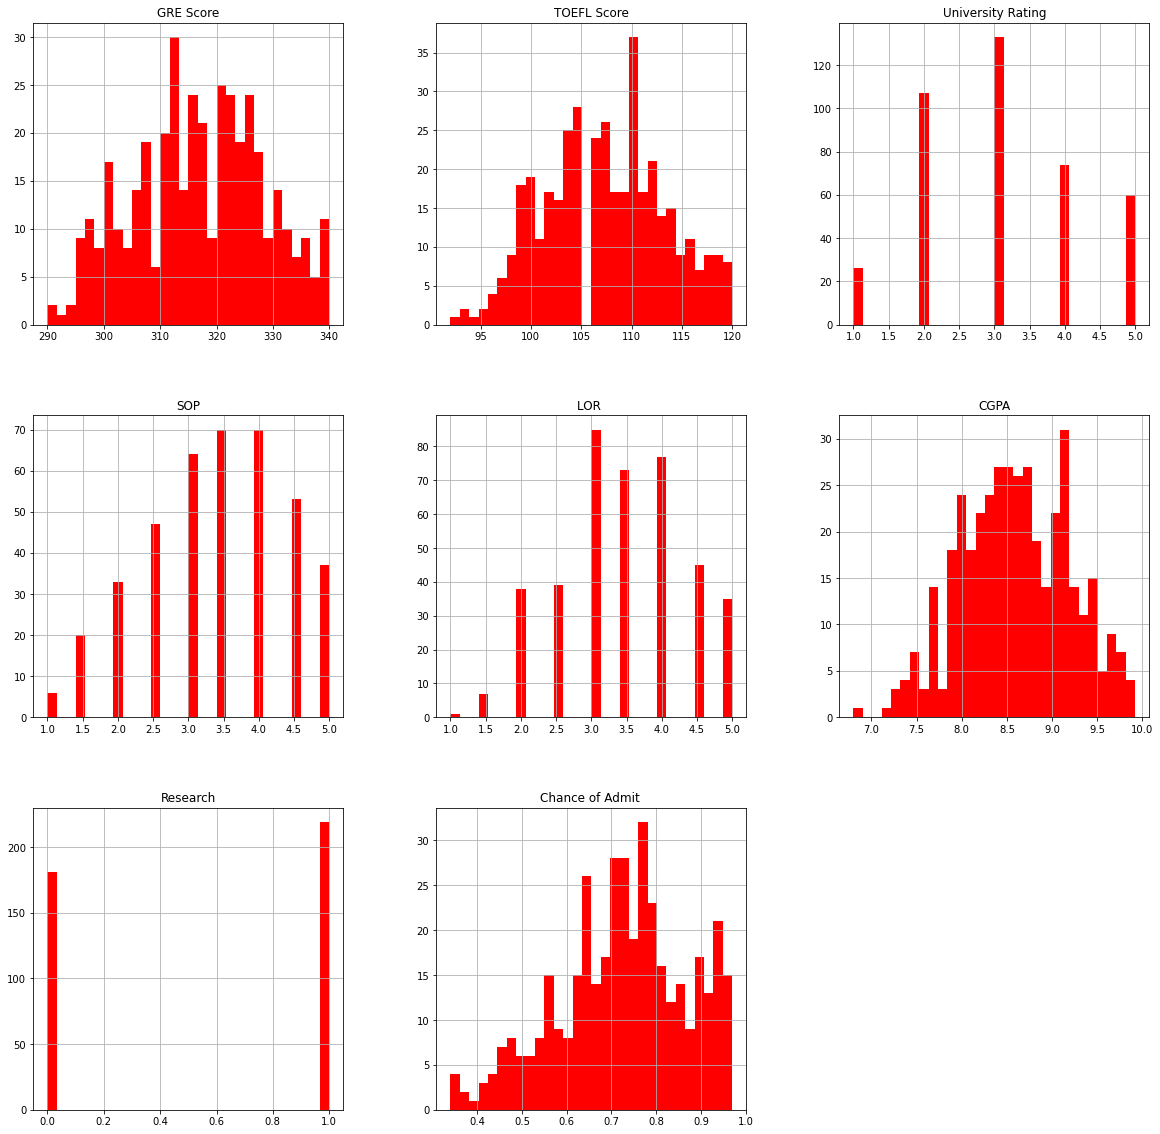

In [10]:
data1.hist(bins = 30, figsize =(20,20), color = 'r')

# Different perpectives of each features

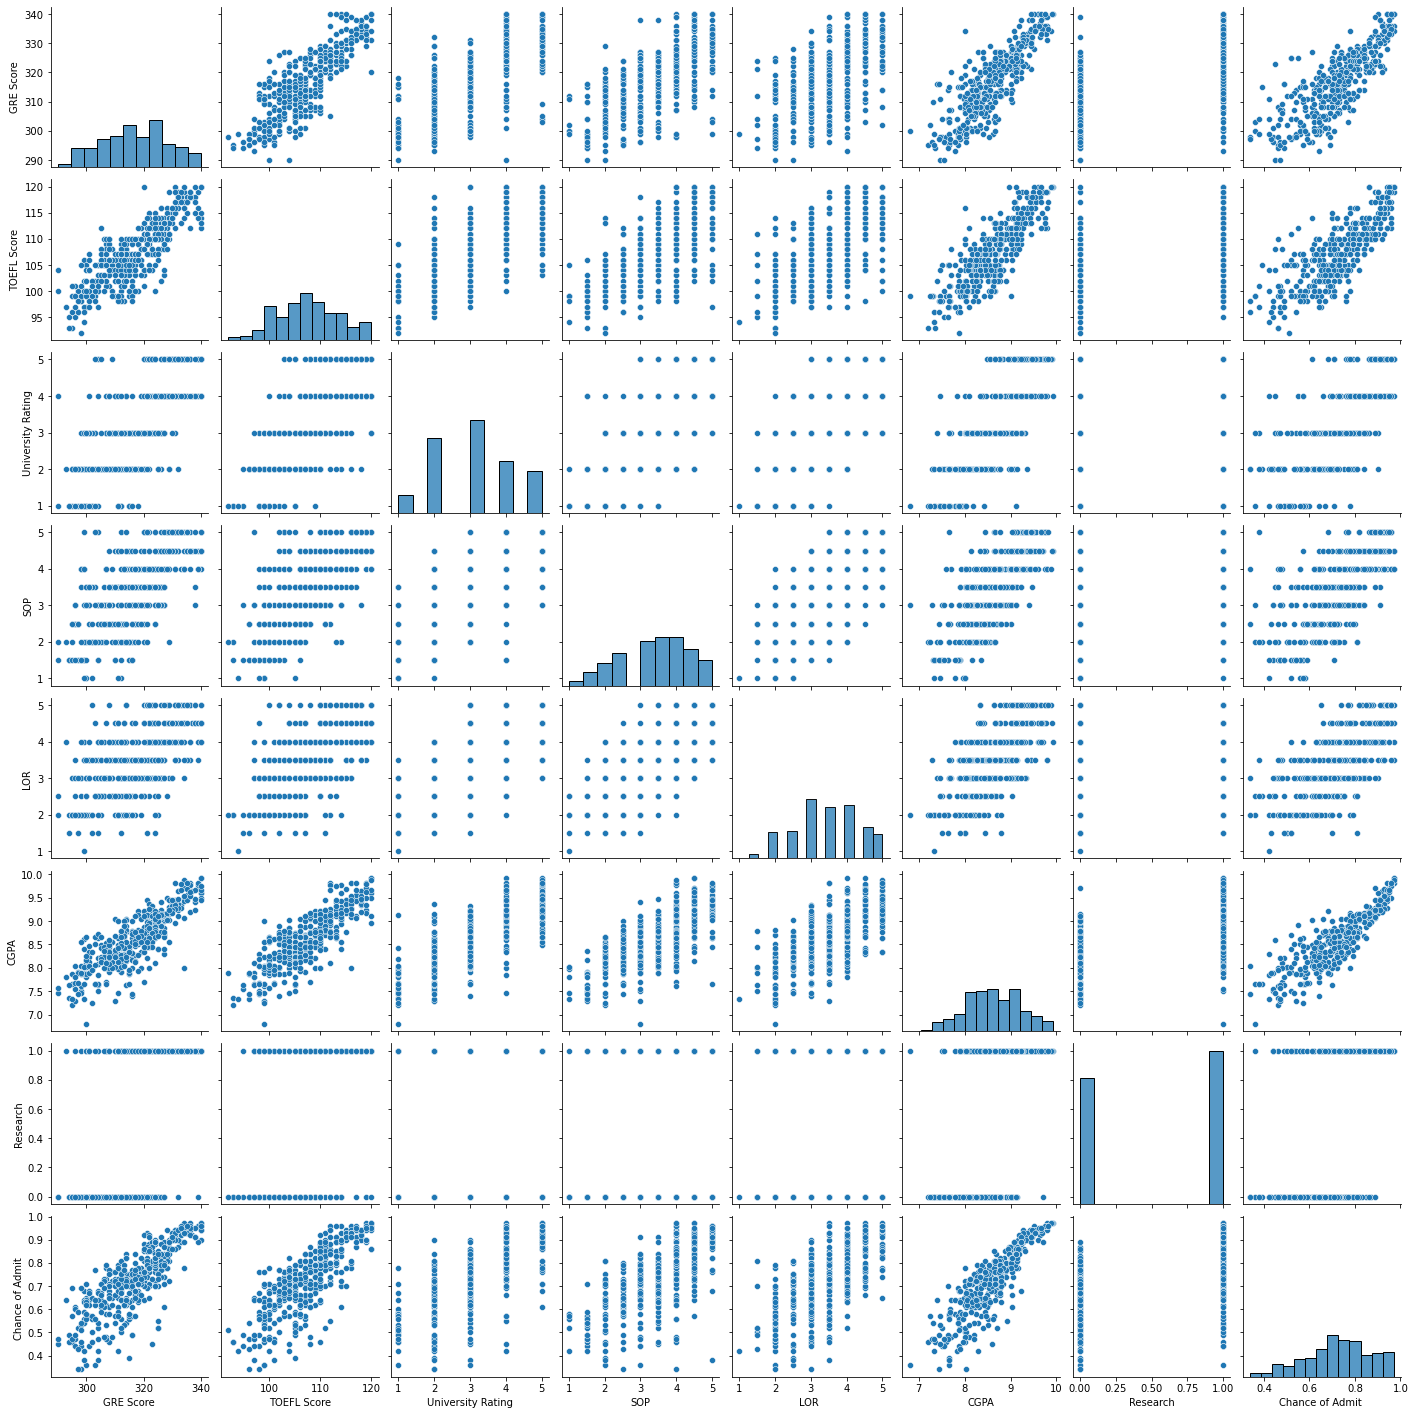

In [12]:
sns.pairplot(data1)

# MATRIX Of Data

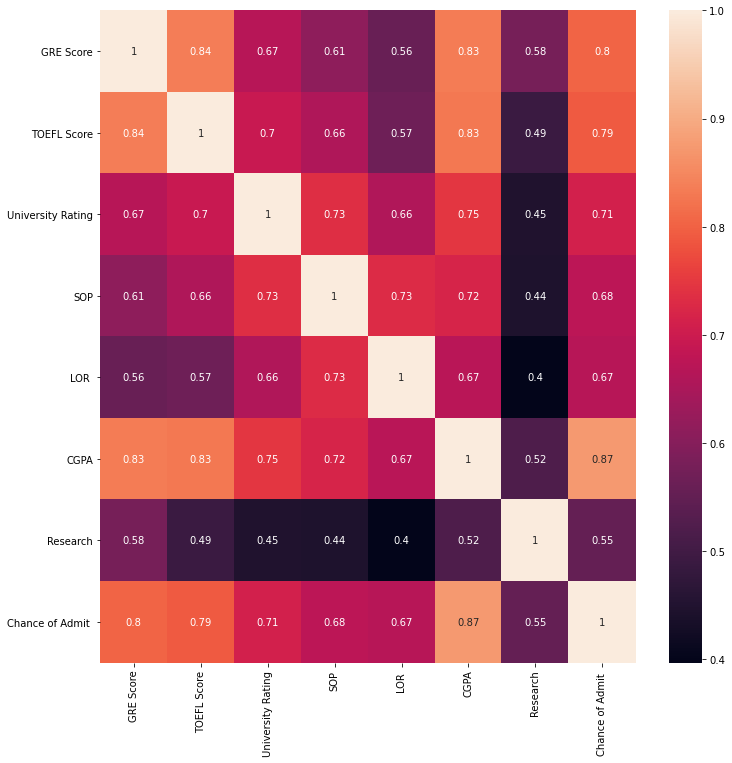

In [13]:
matrix_data1 = data1.corr()
plt.figure(figsize=(12,12,))
sns.heatmap(matrix_data1, annot=True)
plt.show()

# Data Visualization to understand effect of different features on each other and ultimately the chnace of admit.


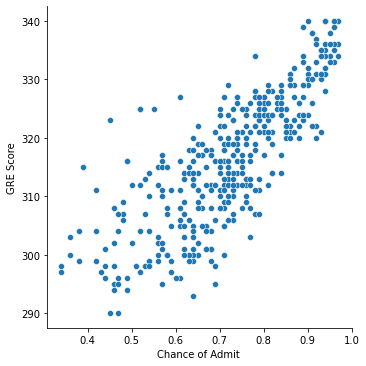

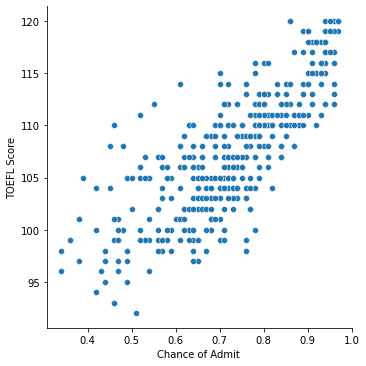

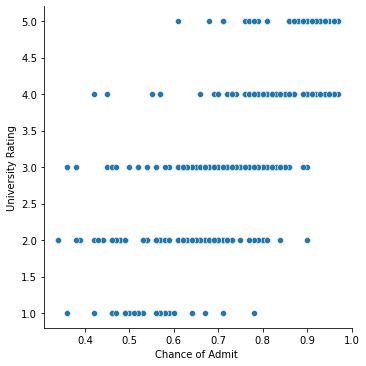

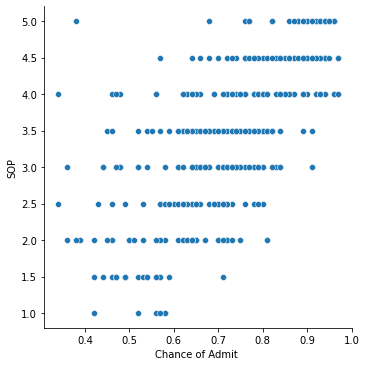

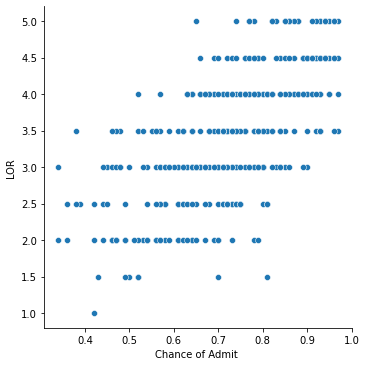

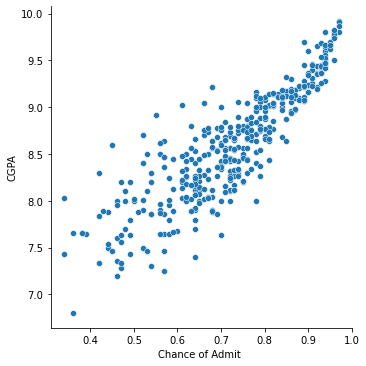

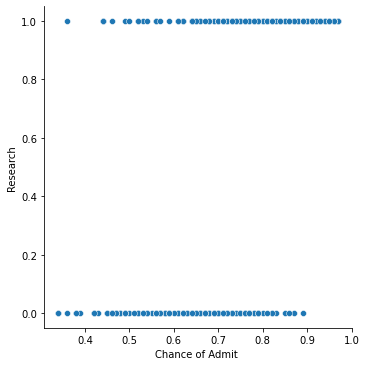

In [16]:
for i in range(len(data1.columns) - 1):
    sns.relplot(x='Chance of Admit ', y=data1.columns[i], data=data1)
    plt.show()

# Line Plot for Research Output and The Chance of Admission

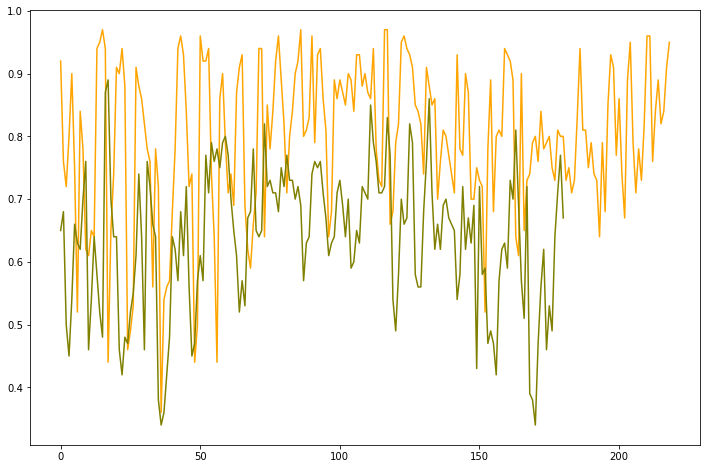

In [17]:
plt.figure(figsize=(12,8))
plt.plot(range(len(data1[data1['Research']==1])), data1[data1['Research']==1]['Chance of Admit '], color='orange')
plt.plot(range(len(data1[data1['Research']==0])), data1[data1['Research']==0]['Chance of Admit '], color='olive')
plt.show()

# PREPARATION Training and Testing Data

In [18]:
data1.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

# Extracting and splitting the datset

In [22]:
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score


# Linear Regression Model

Linear Regression Model

Implementing Linear Regression (Sklearn) as the algrothim on this dataset. What the plots show is that CGPA, TOEFL Score, GRE Score significantly affect the chances of admit.

Further, the above mentioned are also realted to the Universty Rating in the way that higher the University Rating, higher the values required for these features.

In [23]:
# Preparing for fitting
X = data1.iloc[:, :-1]
# Adding bias column to X
Y = data1.iloc[:, -1]

# Normalize function (Feature scaling)
def normalize(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X = (X - mu)/sigma
    return X

X = normalize(X)
X['Research'] = data1['Research']
X['University Rating'] = data1['University Rating']
bias = [1]*(data1.shape[0])
X['bias'] = bias

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape


((300, 8), (300,), (100, 8), (100,))

In [24]:
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,bias
0,1.762107,1.746971,4,1.093864,1.167321,1.764818,1,1
1,0.627656,-0.067635,4,0.596653,1.167321,0.455151,1,1
2,-0.070467,-0.562528,3,-0.397769,0.052933,-1.005631,1,1
3,0.453126,0.427257,3,0.099442,-1.061454,0.119339,1,1
4,-0.244998,-0.727492,2,-1.392191,-0.504260,-0.653029,0,1


In [26]:
clf = LinearRegression()
clf

LinearRegression()

In [29]:
clf.fit(X_train, Y_train)

LinearRegression()

# coefficient

In [32]:
# Theta values calculated
print(clf.coef_)


[0.02304324 0.0177099  0.00501949 0.00068236 0.01433596 0.06767384
 0.02202891 0.        ]


# Intercept

In [33]:
# intercept value
print(clf.intercept_)

0.6994281185851083


# Predict

In [31]:
Y_pred = clf.predict(X_test)
Y_pred

array([0.64916133, 0.72319246, 0.93534894, 0.82161719, 0.58010543,
       0.92955335, 0.52394479, 0.53929604, 0.65966993, 0.84041175,
       0.72162358, 0.90930156, 0.55264646, 0.88798786, 0.69818853,
       0.68758551, 0.66698292, 0.47966361, 0.69109839, 0.97571167,
       0.58657737, 0.65268473, 0.71038978, 0.53186705, 0.94999142,
       0.81035189, 0.69371319, 0.56258221, 0.68188877, 0.81250393,
       0.8094908 , 0.94735252, 0.64584322, 0.51077365, 0.6613749 ,
       0.66643326, 0.7201965 , 0.64437189, 0.61530134, 0.88096998,
       0.7424471 , 0.59837856, 0.77667814, 0.96120512, 0.84893303,
       0.83567587, 0.94889935, 0.6483672 , 0.92235292, 0.8591684 ,
       0.89511656, 0.73010103, 0.78591454, 0.95214742, 0.5747998 ,
       0.59049161, 0.68795469, 0.84501809, 0.60309281, 0.84659426,
       0.6611105 , 0.65563603, 0.69848047, 0.50959855, 0.63049972,
       0.71931506, 0.62133271, 0.84328362, 0.85774204, 0.79722496,
       0.72270856, 0.8193762 , 0.87298172, 0.83133146, 0.52193

In [2]:
X = ['X_test'].values
Y = ['Y_test'].values

AttributeError: 'list' object has no attribute 'values'

In [108]:
mean_X = np.mean(X)
mean_Y = np.mean(Y)


n =len(X)


numer = 0
denom = 0


for i in range(n):
    numer+=(X[i] -mean_X) * (Y[i] - mean_Y)
    denom+=(X[i] -mean_X) ** 2
    
b1 = numer /denom
b0 = mean_Y- (b1 + mean_X)

print(b1,b0)

1.0276495370720693 1.5123504629279307


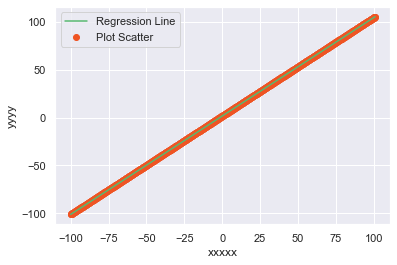

In [109]:
max_x = np.max(X) + 100
min_x = np.min(X) - 100


X = np.linspace(min_x, max_x, 1000)

Y = b0 + b1 * X

plt.plot(X,Y, color ='#58b970', label = 'Regression Line')

plt.scatter(X,Y, c= '#ef5423', label = 'Plot Scatter')


plt.xlabel('xxxxx')
plt.ylabel('yyyy')
plt.legend()
plt.show()



# Check score

In [34]:
print('The Score is :- ', clf.score(X_test, Y_test))

The Score is :-  0.8161147779165654


In [37]:
print('Train Score: ', clf.score(X_train, Y_train))  
print('Test Score: ', clf.score(X_test, Y_test))

Train Score:  0.7958850329341665
Test Score:  0.8161147779165654


In [38]:
mean_squared_error(Y_test,Y_pred)

0.004340829490693753

# Feature selection using Mutual information

In [39]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression

In [40]:
# feature selection
f_selector = SelectKBest(score_func=f_regression, k='all')

In [41]:
# learn relationship from training data
f_selector.fit(X_train, Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:301: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:306: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom


SelectKBest(k='all', score_func=<function f_regression at 0x0000011A5B9FF3A0>)

In [42]:
# transform train input data
X_train_fs = f_selector.transform(X_train)

In [43]:
# transform test input data
X_test_fs = f_selector.transform(X_test)

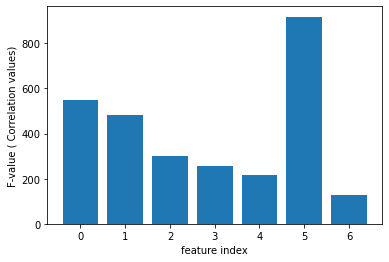

In [45]:
# Plot the scores for the features
plt.bar([i for i in range(len(f_selector.scores_))], f_selector.scores_)
plt.xlabel("feature index")
plt.ylabel("F-value ( Correlation values)")
plt.show()

# Regression Model KPIs

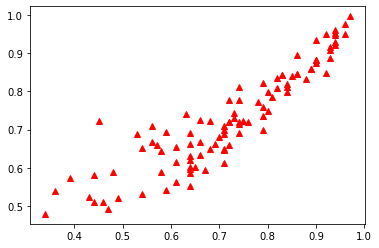

In [51]:
Y_predict = clf.predict(X_test)
plt.plot(Y_test, Y_predict, '^', color = 'r')